# Linear Regression
## By: Kolton Cox

Linear regression is a supervised machine learning algorithm that uses historical data to learn patterns and uncover relationships between other features of your dataset and the target. 

#### Assumptions of Linear Regression

* we assume the targets are close to some linear combination of the features of the input data
* unlike other machine learning algorithms, linear regression gives an exact answer with a finite amount of data

With theses assumptions of a closed-form solution, we can write the following matrix to represent linear regression:

$$
\begin{bmatrix}
x_{1} & 1\\
x_{2} & 1\\
x_{3} & 1\\
\vdots & \vdots\\
x_{n} & 1
\end{bmatrix}
\begin{bmatrix}
w_1\\w_2
\end{bmatrix}
=\begin{bmatrix}
y_1\\y_2\\y_3\\ \vdots\\y_n
\end{bmatrix}
$$

The above matrix notation can also be represented by the following:

$$Xw = y$$

Unfortunately, the X part of our matrix is more than likely not invertible, therefore, the best we can do is to solve for an approximation:

$$X\hat{w}\approx y$$

In order to find a solvable state for the above approxmation, we can apply the following using linear algebra:

$$X^{T}X\hat{w}\approx X^{T}y \implies \hat{w} = (X^{T}X)^{-1}X^{T}y$$

We can now apply the above to a specific point, say $x^*$, to a linear regression system and reach at the following, known as our prediction:

$$y \approx \hat{w_1}x^* + \hat{w_2} $$

In this notebook we will use the following packages:
* Plots [documentation](http://docs.juliaplots.org/latest/)
* CSV [documentation](https://juliadata.github.io/CSV.jl/stable/)



In [3]:
using Plots
using Random

# Ages 18 to 55
ages_x = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]

# Developer Salary
dev_y = [17784, 16500, 18012, 20628, 25206, 30252, 34368, 38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752, 77232,
         78000, 78508, 79536, 82488, 88935, 90000, 90056, 95000, 90000, 91633, 91660, 98150, 98964, 100000, 98988, 100000, 108923, 105000, 103117];

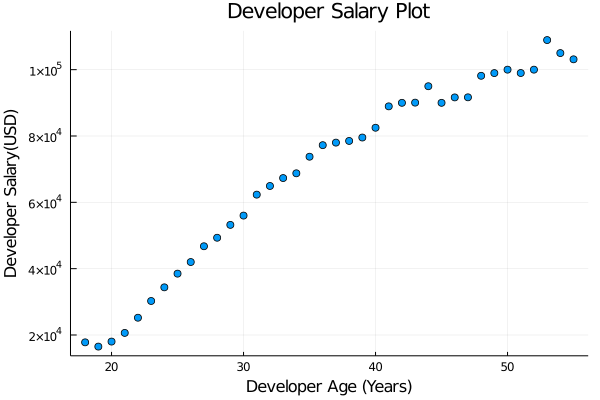

In [4]:
data = [x for x in zip(ages_x, dev_y)]

scatter([p for p in data],
        xaxis = "Developer Age (Years)",
        yaxis = "Developer Salary(USD)",
        title = "Developer Salary Plot",
        legend = false)

We are going to move forward by splitting the data into a training set and a testing set. The code below will assign a random subset from the data as training data and the rest will then be classified into testing data.  

In [5]:
# Randomly select data points from the full data set to make a training data set 
train_x = randsubseq(ages_x, .7)
train_y = [x[2] for x in data if x[1] in train_x]
train_data = [x for x in zip(train_x, train_y)]

test_data = [x for x in data if x ∉ train_data];

The code below will create the matrix X and then solve the equation of $\hat{w}$ as outlined earlier:

$$\hat{w} = (X^{T}X)^{-1}X^{T}y$$

In [6]:
# First make the matrix x
X = ones(length(train_x), 2)
X[:, 1] = train_x


# Next solve for ŵ: 
ŵ = (X'*X)\(X'*train_y)
# To make ŵ = w\hat + TAB

# Note: Ax = b, then x = A\b solves teh system


2-element Array{Float64,1}:
   2497.649096305012
 -22078.180057216257

Now we will define our regression line and plot using the training data that we seperated from the testing data from our earlier dataset. In addition to applying the same process to the testing data. 

In [7]:
# Define the regression line, i.e., the prediction function
prediction(x) = ŵ[1]*x + ŵ[2];

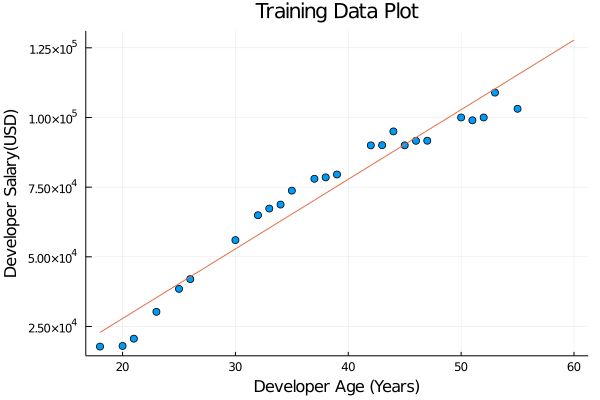

In [8]:
scatter([p for p in train_data],
        xaxis = "Developer Age (Years)",
        yaxis = "Developer Salary(USD)",
        title = "Training Data Plot",
        legend = false)

plot!([(x, prediction(x)) for x = 18:60])

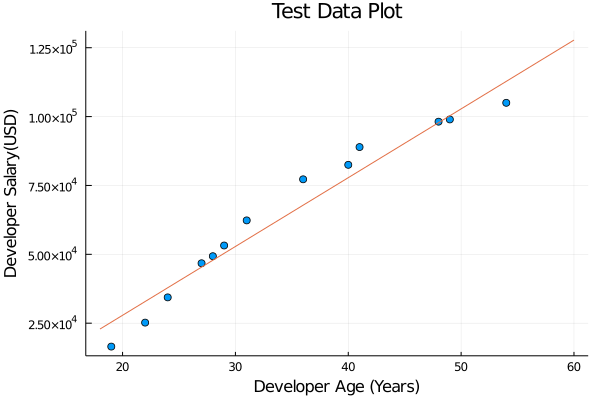

In [9]:
scatter([p for p in test_data],
        xaxis = "Developer Age (Years)",
        yaxis = "Developer Salary(USD)",
        title = "Test Data Plot",
        legend = false)

plot!([(x, prediction(x)) for x = 18:60])

In [10]:
error_array = [abs(prediction(x[1]) - x[2]) for x in train_data];

In [11]:
maximum(error_array)

12175.52023955938

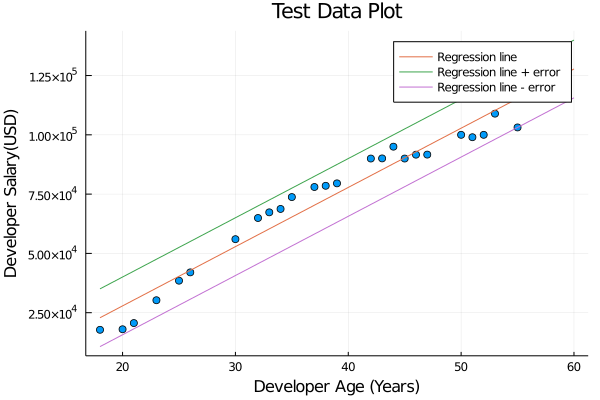

In [12]:
scatter([p for p in train_data],
        label = false,
        xaxis = "Developer Age (Years)",
        yaxis = "Developer Salary(USD)",
        title = "Test Data Plot")

plot!([(x, prediction(x)) for x = 18:60],
        label = "Regression line")

plot!([(x, prediction(x) + maximum(error_array)) for x = 18:60],
        label = "Regression line + error")

plot!([(x, prediction(x) - maximum(error_array)) for x = 18:60],
        label = "Regression line - error")

In [13]:
prediction_interval(x) = (prediction(x) - maximum(error_array), prediction(x) + maximum(error_array))

prediction_interval (generic function with 1 method)

In [14]:
test_data

13-element Array{Tuple{Int64,Int64},1}:
 (19, 16500)
 (22, 25206)
 (24, 34368)
 (27, 46752)
 (28, 49320)
 (29, 53200)
 (31, 62316)
 (36, 77232)
 (40, 82488)
 (41, 88935)
 (48, 98150)
 (49, 98964)
 (54, 105000)

In [16]:
prediction_interval(41)

(68149.91265172984, 92500.9531308486)

From this we can see that the program learned from out prediction interval and determined that the salary for a softwar developer of 41 years of age has a salary between ${$68,149} - {$92,500}$.